In [2]:
######################################################################################################
##################################   Surface Tension Calculation #####################################
######################################################################################################
import yt
from matplotlib import rc_context
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
print(yt.__version__)

3.6.1


In [3]:
############    modify if needed    ############################
step1 = 4000
step0 = 0
temperature = 0.
alpha0 = 4.
cs2 = 1./3.
nx = 32
ny = 32
nz = 32
#######################################################

plot_file_dir_last = "./data_droplet_alpha0_{:.2f}_size{:d}-{:d}-{:d}_II/lbm_data_shshan_alpha0_".format(alpha0,nx,ny,nz) +\
      "{:.2f}".format(alpha0) + "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz) + f"{step1:06d}"
plot_file_dir_init = "./data_droplet_alpha0_{:.2f}_size{:d}-{:d}-{:d}_II/lbm_data_shshan_alpha0_".format(alpha0,nx,ny,nz) +\
      "{:.2f}".format(alpha0) + "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz) + f"{step0:06d}"
print("load in data file:")
print(plot_file_dir_init)
print(plot_file_dir_last)
ds1 = yt.load(plot_file_dir_last)
ds0 = yt.load(plot_file_dir_init)
print(ds0.field_list)
#profile_data = ds.all_data()[("boxlib", "struct_fact_rho_rho")].to_ndarray()
profile_data0 = ds0.covering_grid(
    level=0, left_edge=ds0.domain_left_edge, dims=ds0.domain_dimensions
)
profile_data1 = ds1.covering_grid(
    level=0, left_edge=ds1.domain_left_edge, dims=ds1.domain_dimensions
)
rho_frame0 = profile_data0["boxlib", "rho"]
rho_frame1 = profile_data1["boxlib", "rho"]

rho_mean0 = np.mean(rho_frame0)
rho_mean1 = np.mean(rho_frame1)
print("{:.3e}".format(rho_mean0/rho_mean1))


print(rho_frame0)
print(rho_frame1)

'''
print("rho_mean = {:.3f} and rho_max = {:.3f}".format(rho_mean,rho_max))
rho_mean/(rho_max*(4.*np.pi/3.)*radius**3)
'''

load in data file:
./data_droplet_alpha0_4.00_size32-32-32_II/lbm_data_shshan_alpha0_4.00_xi_0.0e+00_size32-32-32/plt000000
./data_droplet_alpha0_4.00_size32-32-32_II/lbm_data_shshan_alpha0_4.00_xi_0.0e+00_size32-32-32/plt004000


yt : [INFO     ] 2025-02-10 15:41:11,492 Parameters: current_time              = 4000.0
yt : [INFO     ] 2025-02-10 15:41:11,493 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-02-10 15:41:11,495 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-02-10 15:41:11,497 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-02-10 15:41:11,546 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-02-10 15:41:11,548 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-02-10 15:41:11,550 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-02-10 15:41:11,552 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'afx'), ('boxlib', 'afy'), ('boxlib', 'afz'), ('boxlib', 'agx'), ('boxlib', 'agy'), ('boxlib', 'agz'), ('boxlib', 'p_bulk'), ('boxlib', 'phi'), ('boxlib', 'rho'), ('boxlib', 'ufx'), ('boxlib', 'ufy'), ('boxlib', 'ufz'), ('boxlib', 'ugx'), ('boxlib', 'ugy'), ('boxlib', 'ugz')]
1.000e+00 dimensionless
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]

'\nprint("rho_mean = {:.3f} and rho_max = {:.3f}".format(rho_mean,rho_max))\nrho_mean/(rho_max*(4.*np.pi/3.)*radius**3)\n'

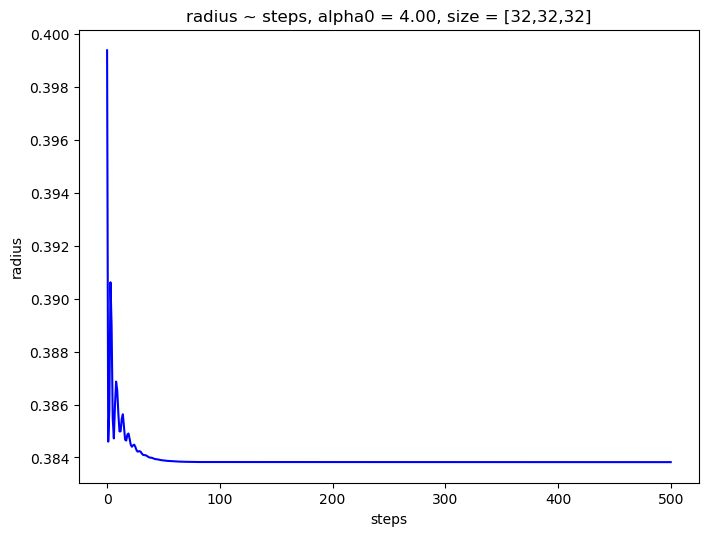

In [15]:
alpha0 = 4.
nx = 32
ny = 32
nz = 32

plot_file_radius = "./data_droplet_alpha0_{:.2f}_size{:d}-{:d}-{:d}_II/radius_steps_out".format(alpha0, nx, ny, nz)
with open(plot_file_radius, 'r') as file:
    # Read the entire content of the file
    content = file.read()
    
    # Split the content by the tab character '\t' to create a 1D array
    data_list = [float(x) for x in content.split('\t') if x.strip()]

data_array = np.array(data_list)
N  = data_array.size
step = np.linspace(0, N-1, N)
#print(data_array)

# Plotting the data
plt.figure(figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(step, data_array, color='b')  # Create a line plot
plt.yscale('linear')
# Add labels and title
plt.xlabel("steps")  # X-axis label
plt.ylabel("radius")  # Y-axis label
plt.title("radius ~ steps, alpha0 = {:.2f}, size = [{:d},{:d},{:d}]".format(alpha0, nx, ny, nz))  # Plot title

# Show the plot
plt.show()

In [28]:
##### modified fitting #####

R = 0.22145
###########################    modify if needed    ############################
alpha0 = 3.
cs2 = 1./3.
r0 = [0.506432,0.506434,0.506434]       # obtained from AMReX code, center of mass 
temperature = 0.
nx = 32
ny = 32
nz = 32

frame_step = 4000
###############################################################################

# load in frame file
plot_file_dir = "./data_droplet_alpha0_{:.2f}_size{:d}-{:d}-{:d}/lbm_data_shshan_alpha0_{:.2f}".format(alpha0,nx,ny,nz,alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz) + f"{frame_step:06}"
ds = yt.load(plot_file_dir)
print(ds.field_list)
profile_data = ds.covering_grid(
    level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions
)
ax = profile_data["boxlib", "afx"]
ay = profile_data["boxlib", "afy"]
az = profile_data["boxlib", "afz"]
rho = profile_data["boxlib", "rho"]
domain_size = ds.domain_dimensions
domain_right_edge = ds.domain_right_edge
print("acceleration field ax has shape ", ax.shape)
 
deltaP = 0.
dx = domain_right_edge[0]/domain_size[0]
dy = domain_right_edge[1]/domain_size[1]
dz = domain_right_edge[2]/domain_size[2]

nc = [int(r0[0]//dx), int(r0[1]//dy), int(r0[2]//dz)]
print("center of mass grid index:", nc)
deltaP = 0.
for nx in range(0, domain_size[0]):
    print("acceleration {:.8f}\tgrid index {:d}".format(ax[nx,nc[1],nc[2]], nx))
for nx in range(0, domain_size[0]//2):
    #print(rho[nx,nc[1],nc[2]])
    deltaP = deltaP + rho[nx,nc[1],nc[2]]*ax[nx,nc[1],nc[2]]*dx
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along x =", deltaP*R)

deltaP = 0.
for ny in range(0, domain_size[1]//2):
    deltaP = deltaP + rho[nc[0],ny,nc[2]]*ay[nc[0],ny,nc[2]]*dy
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along y =", deltaP*R)

yt : [INFO     ] 2025-02-10 01:35:19,497 Parameters: current_time              = 4000.0
yt : [INFO     ] 2025-02-10 01:35:19,498 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-02-10 01:35:19,500 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-02-10 01:35:19,501 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'afx'), ('boxlib', 'afy'), ('boxlib', 'afz'), ('boxlib', 'agx'), ('boxlib', 'agy'), ('boxlib', 'agz'), ('boxlib', 'p_bulk'), ('boxlib', 'phi'), ('boxlib', 'rho'), ('boxlib', 'ufx'), ('boxlib', 'ufy'), ('boxlib', 'ufz'), ('boxlib', 'ugx'), ('boxlib', 'ugy'), ('boxlib', 'ugz')]
acceleration field ax has shape  (32, 32, 32)
center of mass grid index: [16, 16, 16]
acceleration -0.00000000 dimensionless	grid index 0
acceleration 0.00035607 dimensionless	grid index 1
acceleration 0.00114304 dimensionless	grid index 2
acceleration 0.00341614 dimensionless	grid index 3
acceleration 0.01034905 dimensionless	grid index 4
acceleration 0.03093415 dimensionless	grid index 5
acceleration 0.08334610 dimensionless	grid index 6
acceleration 0.17183001 dimensionless	grid index 7
acceleration 0.23532945 dimensionless	grid index 8
acceleration 0.20224654 dimensionless	grid index 9
acceleration 0.11005192 dimensionless	grid index 10
acceleration 0.04164052 dimensionless	grid index 11
accelerati

In [31]:
##### modified fitting #####

R = 0.2468
###########################    modify if needed    ############################
alpha0 = 3.2
cs2 = 1./3.
r0 = [0.506432,0.506434,0.506434]       # obtained from AMReX code, center of mass 
temperature = 0.
nx = 32
ny = 32
nz = 32

frame_step = 4000
###############################################################################

# load in frame file
plot_file_dir = "./data_droplet_alpha0_{:.2f}_size{:d}-{:d}-{:d}/lbm_data_shshan_alpha0_{:.2f}".format(alpha0,nx,ny,nz,alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz) + f"{frame_step:06}"
ds = yt.load(plot_file_dir)
print(ds.field_list)
profile_data = ds.covering_grid(
    level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions
)
ax = profile_data["boxlib", "afx"]
ay = profile_data["boxlib", "afy"]
az = profile_data["boxlib", "afz"]
rho = profile_data["boxlib", "rho"]
domain_size = ds.domain_dimensions
domain_right_edge = ds.domain_right_edge
print("acceleration field ax has shape ", ax.shape)
 
deltaP = 0.
dx = domain_right_edge[0]/domain_size[0]
dy = domain_right_edge[1]/domain_size[1]
dz = domain_right_edge[2]/domain_size[2]

nc = [int(r0[0]//dx), int(r0[1]//dy), int(r0[2]//dz)]
print("center of mass grid index:", nc)
deltaP = 0.
for nx in range(0, domain_size[0]):
    print("acceleration {:.8f}\tgrid index {:d}".format(ax[nx,nc[1],nc[2]], nx))
for nx in range(0, domain_size[0]//2):
    #print(rho[nx,nc[1],nc[2]])
    deltaP = deltaP + rho[nx,nc[1],nc[2]]*ax[nx,nc[1],nc[2]]*dx
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along x =", deltaP*R)

deltaP = 0.
for ny in range(0, domain_size[1]//2):
    deltaP = deltaP + rho[nc[0],ny,nc[2]]*ay[nc[0],ny,nc[2]]*dy
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along y =", deltaP*R)

yt : [INFO     ] 2025-02-10 02:49:13,984 Parameters: current_time              = 4000.0
yt : [INFO     ] 2025-02-10 02:49:13,985 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-02-10 02:49:13,986 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-02-10 02:49:13,987 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'afx'), ('boxlib', 'afy'), ('boxlib', 'afz'), ('boxlib', 'agx'), ('boxlib', 'agy'), ('boxlib', 'agz'), ('boxlib', 'p_bulk'), ('boxlib', 'phi'), ('boxlib', 'rho'), ('boxlib', 'ufx'), ('boxlib', 'ufy'), ('boxlib', 'ufz'), ('boxlib', 'ugx'), ('boxlib', 'ugy'), ('boxlib', 'ugz')]
acceleration field ax has shape  (32, 32, 32)
center of mass grid index: [16, 16, 16]
acceleration 0.00000000 dimensionless	grid index 0
acceleration 0.00049522 dimensionless	grid index 1
acceleration 0.00178996 dimensionless	grid index 2
acceleration 0.00623936 dimensionless	grid index 3
acceleration 0.02203527 dimensionless	grid index 4
acceleration 0.07235836 dimensionless	grid index 5
acceleration 0.17968555 dimensionless	grid index 6
acceleration 0.27888474 dimensionless	grid index 7
acceleration 0.25257768 dimensionless	grid index 8
acceleration 0.13308501 dimensionless	grid index 9
acceleration 0.04420240 dimensionless	grid index 10
acceleration 0.01179518 dimensionless	grid index 11
acceleratio

In [32]:
##### modified fitting #####

R = 0.266272
###########################    modify if needed    ############################
alpha0 = 3.5
cs2 = 1./3.
r0 = [0.506432,0.506434,0.506434]       # obtained from AMReX code, center of mass 
temperature = 0.
nx = 32
ny = 32
nz = 32

frame_step = 4000
###############################################################################

# load in frame file
plot_file_dir = "./data_droplet_alpha0_{:.2f}_size{:d}-{:d}-{:d}/lbm_data_shshan_alpha0_{:.2f}".format(alpha0,nx,ny,nz,alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz) + f"{frame_step:06}"
ds = yt.load(plot_file_dir)
print(ds.field_list)
profile_data = ds.covering_grid(
    level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions
)
ax = profile_data["boxlib", "afx"]
ay = profile_data["boxlib", "afy"]
az = profile_data["boxlib", "afz"]
rho = profile_data["boxlib", "rho"]
domain_size = ds.domain_dimensions
domain_right_edge = ds.domain_right_edge
print("acceleration field ax has shape ", ax.shape)
 
deltaP = 0.
dx = domain_right_edge[0]/domain_size[0]
dy = domain_right_edge[1]/domain_size[1]
dz = domain_right_edge[2]/domain_size[2]

nc = [int(r0[0]//dx), int(r0[1]//dy), int(r0[2]//dz)]
print("center of mass grid index:", nc)
deltaP = 0.
for nx in range(0, domain_size[0]):
    print("acceleration {:.8f}\tgrid index {:d}".format(ax[nx,nc[1],nc[2]], nx))
for nx in range(0, domain_size[0]//2):
    #print(rho[nx,nc[1],nc[2]])
    deltaP = deltaP + rho[nx,nc[1],nc[2]]*ax[nx,nc[1],nc[2]]*dx
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along x =", deltaP*R)

deltaP = 0.
for ny in range(0, domain_size[1]//2):
    deltaP = deltaP + rho[nc[0],ny,nc[2]]*ay[nc[0],ny,nc[2]]*dy
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along y =", deltaP*R)

yt : [INFO     ] 2025-02-10 03:43:51,003 Parameters: current_time              = 4000.0
yt : [INFO     ] 2025-02-10 03:43:51,005 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-02-10 03:43:51,008 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-02-10 03:43:51,011 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'afx'), ('boxlib', 'afy'), ('boxlib', 'afz'), ('boxlib', 'agx'), ('boxlib', 'agy'), ('boxlib', 'agz'), ('boxlib', 'p_bulk'), ('boxlib', 'phi'), ('boxlib', 'rho'), ('boxlib', 'ufx'), ('boxlib', 'ufy'), ('boxlib', 'ufz'), ('boxlib', 'ugx'), ('boxlib', 'ugy'), ('boxlib', 'ugz')]
acceleration field ax has shape  (32, 32, 32)
center of mass grid index: [16, 16, 16]
acceleration 0.00000000 dimensionless	grid index 0
acceleration 0.00057105 dimensionless	grid index 1
acceleration 0.00231729 dimensionless	grid index 2
acceleration 0.00979969 dimensionless	grid index 3
acceleration 0.04259490 dimensionless	grid index 4
acceleration 0.15047536 dimensionless	grid index 5
acceleration 0.31320264 dimensionless	grid index 6
acceleration 0.34616530 dimensionless	grid index 7
acceleration 0.19970083 dimensionless	grid index 8
acceleration 0.06130722 dimensionless	grid index 9
acceleration 0.01254932 dimensionless	grid index 10
acceleration 0.00264040 dimensionless	grid index 11
acceleratio

In [16]:
##### modified fitting #####

R1 = 0.281392    # init 0.3
R2 = 0.383825    # init 0.4

###########################    modify if needed    ############################
alpha0 = 4.
cs2 = 1./3.
r0 = [0.506432,0.506434,0.506434]       # obtained from AMReX code, center of mass 
temperature = 0.
nx = 32
ny = 32
nz = 32

frame_step = 4000
###############################################################################

# load in frame file
plot_file_dir_I = "./data_droplet_alpha0_{:.2f}_size{:d}-{:d}-{:d}_I/lbm_data_shshan_alpha0_{:.2f}".format(alpha0,nx,ny,nz,alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz) + f"{frame_step:06}"
plot_file_dir_II = "./data_droplet_alpha0_{:.2f}_size{:d}-{:d}-{:d}_II/lbm_data_shshan_alpha0_{:.2f}".format(alpha0,nx,ny,nz,alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz) + f"{frame_step:06}"

ds1 = yt.load(plot_file_dir_I)
ds2 = yt.load(plot_file_dir_II)

print(ds1.field_list)
profile_data_I = ds1.covering_grid(
    level=0, left_edge=ds1.domain_left_edge, dims=ds1.domain_dimensions
)
profile_data_II = ds2.covering_grid(
    level=0, left_edge=ds2.domain_left_edge, dims=ds2.domain_dimensions
)
ax = profile_data_I["boxlib", "afx"]
ay = profile_data_I["boxlib", "afy"]
az = profile_data_I["boxlib", "afz"]
rho = profile_data_I["boxlib", "rho"]
domain_size = ds1.domain_dimensions
domain_right_edge = ds1.domain_right_edge
print("acceleration field ax has shape ", ax.shape)
 
deltaP = 0.
dx = domain_right_edge[0]/domain_size[0]
dy = domain_right_edge[1]/domain_size[1]
dz = domain_right_edge[2]/domain_size[2]

nc = [int(r0[0]//dx), int(r0[1]//dy), int(r0[2]//dz)]
print("center of mass grid index:", nc)
deltaP = 0.
#for nx in range(0, domain_size[0]):
    #print("acceleration {:.8f}\tgrid index {:d}".format(ax[nx,nc[1],nc[2]], nx))
for nx in range(0, domain_size[0]//2):
    #print(rho[nx,nc[1],nc[2]])
    deltaP = deltaP + rho[nx,nc[1],nc[2]]*ax[nx,nc[1],nc[2]]*dx
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along x =", deltaP*R1)

deltaP = 0.
for ny in range(0, domain_size[1]//2):
    deltaP = deltaP + rho[nc[0],ny,nc[2]]*ay[nc[0],ny,nc[2]]*dy
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along y =", deltaP*R1)

ax = profile_data_II["boxlib", "afx"]
ay = profile_data_II["boxlib", "afy"]
az = profile_data_II["boxlib", "afz"]
rho = profile_data_II["boxlib", "rho"]
domain_size = ds1.domain_dimensions
domain_right_edge = ds1.domain_right_edge
deltaP = 0.
for nx in range(0, domain_size[0]//2):
    #print(rho[nx,nc[1],nc[2]])
    deltaP = deltaP + rho[nx,nc[1],nc[2]]*ax[nx,nc[1],nc[2]]*dx
deltaP = deltaP.value
print("deltaP*R along x =", deltaP*R2)



yt : [INFO     ] 2025-02-10 17:14:42,152 Parameters: current_time              = 4000.0
yt : [INFO     ] 2025-02-10 17:14:42,153 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-02-10 17:14:42,154 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-02-10 17:14:42,155 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-02-10 17:14:42,237 Parameters: current_time              = 4000.0
yt : [INFO     ] 2025-02-10 17:14:42,238 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-02-10 17:14:42,239 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-02-10 17:14:42,241 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'afx'), ('boxlib', 'afy'), ('boxlib', 'afz'), ('boxlib', 'agx'), ('boxlib', 'agy'), ('boxlib', 'agz'), ('boxlib', 'p_bulk'), ('boxlib', 'phi'), ('boxlib', 'rho'), ('boxlib', 'ufx'), ('boxlib', 'ufy'), ('boxlib', 'ufz'), ('boxlib', 'ugx'), ('boxlib', 'ugy'), ('boxlib', 'ugz')]
acceleration field ax has shape  (32, 32, 32)
center of mass grid index: [16, 16, 16]
0.011601573402601423
deltaP*R along x = 0.0032645899429048194
0.011601264323057373
deltaP*R along y = 0.00326450297039376
deltaP*R along x = 0.0017338972221325555


In [77]:
R = 0.186078

###########################    modify if needed    ############################
alpha0 = 5.
cs2 = 1./3.
r0 = [0.506432,0.506434,0.506434]       # obtained from AMReX code, center of mass 
temperature = 0.
nx = 32
ny = 32
nz = 32

frame_step = 4000
###############################################################################

# load in frame file
plot_file_dir = "./data_droplet_alpha0_{:.2f}_size{:d}-{:d}-{:d}/lbm_data_shshan_alpha0_{:.2f}".format(alpha0,nx,ny,nz,alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/plt".format(nx,ny,nz) + f"{frame_step:06}"
ds = yt.load(plot_file_dir)
print(ds.field_list)
profile_data = ds.covering_grid(
    level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions
)
ax = profile_data["boxlib", "afx"]
ay = profile_data["boxlib", "afy"]
az = profile_data["boxlib", "afz"]
rho = profile_data["boxlib", "rho"]
domain_size = ds.domain_dimensions
domain_right_edge = ds.domain_right_edge
print("acceleration field ax has shape ", ax.shape)
 
deltaP = 0.
dx = domain_right_edge[0]/domain_size[0]
dy = domain_right_edge[1]/domain_size[1]
dz = domain_right_edge[2]/domain_size[2]

nc = [int(r0[0]//dx), int(r0[1]//dy), int(r0[2]//dz)]
print("center of mass grid index:", nc)
deltaP = 0.
for nx in range(0, domain_size[0]):
    print("acceleration {:.8f}\tgrid index {:d}".format(ax[nx,nc[1],nc[2]], nx))
for nx in range(0, domain_size[0]//2):
    #print(rho[nx,nc[1],nc[2]])
    deltaP = deltaP + rho[nx,nc[1],nc[2]]*ax[nx,nc[1],nc[2]]*dx
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along x =", deltaP*R)

deltaP = 0.
for ny in range(0, domain_size[1]//2):
    deltaP = deltaP + rho[nc[0],ny,nc[2]]*ay[nc[0],ny,nc[2]]*dy
deltaP = deltaP.value
print(deltaP)
print("deltaP*R along y =", deltaP*R)

yt : [INFO     ] 2025-02-10 06:03:53,677 Parameters: current_time              = 4000.0
yt : [INFO     ] 2025-02-10 06:03:53,678 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-02-10 06:03:53,680 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-02-10 06:03:53,682 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'afx'), ('boxlib', 'afy'), ('boxlib', 'afz'), ('boxlib', 'agx'), ('boxlib', 'agy'), ('boxlib', 'agz'), ('boxlib', 'p_bulk'), ('boxlib', 'phi'), ('boxlib', 'rho'), ('boxlib', 'ufx'), ('boxlib', 'ufy'), ('boxlib', 'ufz'), ('boxlib', 'ugx'), ('boxlib', 'ugy'), ('boxlib', 'ugz')]
acceleration field ax has shape  (32, 32, 32)
center of mass grid index: [16, 16, 16]
acceleration -0.00002145 dimensionless	grid index 0
acceleration 0.00044746 dimensionless	grid index 1
acceleration 0.00086471 dimensionless	grid index 2
acceleration 0.00104158 dimensionless	grid index 3
acceleration 0.00082233 dimensionless	grid index 4
acceleration 0.00044145 dimensionless	grid index 5
acceleration 0.00224692 dimensionless	grid index 6
acceleration 0.03492609 dimensionless	grid index 7
acceleration 0.31129476 dimensionless	grid index 8
acceleration 0.68275375 dimensionless	grid index 9
acceleration 0.53124190 dimensionless	grid index 10
acceleration 0.12509111 dimensionless	grid index 11
accelerati